## **Lấy dữ liệu từ dataset**





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sys

In [ ]:
path1 = '/content/sample_data/data1.csv'
data1 = np.genfromtxt(path1, delimiter=',')
data1

OSError: ignored

## Cấu trúc fuzzy c-means

Tìm minimum và maximum

In [ ]:
def find_max(dataset):
  cols = dataset.shape[1]
  max_in_dataset = -sys.maxsize
  for col in range(cols):
    if max(dataset[:, col]) > max_in_dataset:
      max_in_dataset = max(dataset[:, col])
  return max_in_dataset

In [ ]:
def find_min(dataset):
  cols = dataset.shape[1]
  min_in_dataset = sys.maxsize
  for col in range(cols):
    if min(dataset[:, col]) < min_in_dataset:
      min_in_dataset = min(dataset[:, col])
  return min_in_dataset

Chọn các giá trị random

In [ ]:
def initialize_centroids(dataset, k, minimum, maximum):
  cols = dataset.shape[1]
  centroids = np.array([np.array([random.uniform(minimum, maximum) for col in range(cols)]) for i in range(k)])
  return centroids

Tính độ mờ cho mỗi điểm
<br>
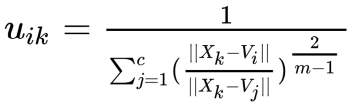

In [ ]:
def update_data_fuzziness(dataset, centroids, m):
  u = np.array([[1 / np.sum([(np.linalg.norm(data - vi) / np.linalg.norm(data - vj)) ** (2 / (m - 1)) for vj in centroids]) for vi in centroids]for data in dataset], dtype='float64')  
  return u

Tìm giá trị trung bình của các điểm
<br>

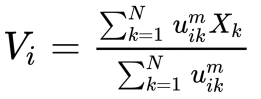

In [ ]:
def modify_centroids(num_centroids, u, dataset, m):
  N = len(dataset)
  centroids = np.array([np.add.reduce([(u[k, i] ** m) * dataset[k] for k in range(N)]) / np.sum([u_[i] ** m for u_ in u]) for i in range(num_centroids)])
  return centroids

Tính độ sai số

In [ ]:
def error_calculator(u, m, dataset, centroids):
  error = np.sum([np.sum([(u[j, i] ** m) * (np.linalg.norm(dataset[j] - centroids[i]) ** 2) 
            for i in range(len(centroids))]) 
      for j in range(len(dataset))])
  return error

Tạo model FCM

In [ ]:
def fuzzy_cmeans_model(dataset, k, num_iterations, m):
  minimum = find_min(dataset)
  maximum = find_max(dataset)

  centroids = initialize_centroids(dataset, k, minimum, maximum)

  for i in range(num_iterations):
    u = update_data_fuzziness(dataset, centroids, m)
    centroids = modify_centroids(len(centroids), u, dataset, m)
    error = error_calculator(u, m, dataset, centroids)

  return centroids, u, error

Plot kết quả

In [ ]:
def plot_results(dataset, u, centroids, k):
  plt.figure(figsize=(8,6))
  plt.scatter(dataset[:, 0], dataset[:, 1])
  for cluster in range(k):
      clusteredData = np.array([dataset[i] for i in range(len(dataset)) 
          if cluster == np.argmax(u[i])])
      plt.scatter(clusteredData[:, 0], clusteredData[:, 1])
  plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=100)
  plt.show()

In [ ]:
def fuzzy_plot(dataset, u, centroids, k):
  plt.figure(figsize=(8,6))
  plt.scatter(dataset[:, 0], dataset[:, 1], c=u)
  plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=100)

## Áp dụng vào dataset

In [ ]:
errors = []

for i in range(1,7):
  centroids, u, error = fuzzy_cmeans_model(dataset=data1, k=i, num_iterations=100, m=2)
  errors.append(error)

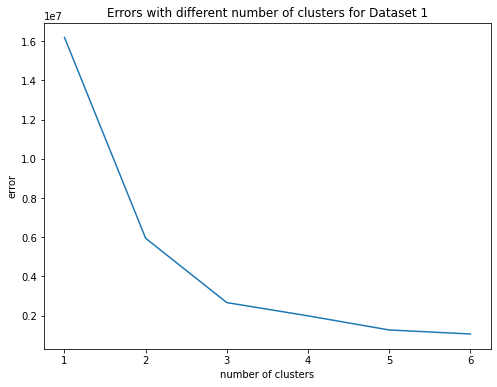

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(np.arange(1, 7), errors)
plt.title('Errors with different number of clusters for Dataset 1')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

Chọn k = 3

In [ ]:
centroids, u, error = fuzzy_cmeans_model(dataset=data1, k=3, num_iterations=100, m=2)

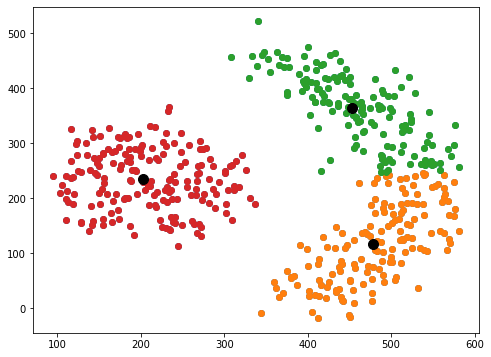

In [ ]:
plot_results(data1, u, centroids, k=3)